In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
#reading in data
train = pd.read_csv('../datasets/cleaned_train.csv', keep_default_na=False, na_values=[''])
test = pd.read_csv('../datasets/cleaned_test.csv', keep_default_na=False, na_values=[''])

In [3]:
problem_cols = ['Neighborhood', 'Condition 1', 'Condition 2', 'MS Zoning']
numeric_cols = train._get_numeric_data().columns
high_corr_cols = numeric_cols[train.corr()['SalePrice'] > .4]
num_cols = high_corr_cols.drop('SalePrice')
features = list(num_cols) + problem_cols

In [4]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8539245541527121, 0.8514504364629247)

In [7]:
mean_squared_error(y_train, lr.predict(X_train))

912549574.897912

In [8]:
y_pred = lr.predict(X_test)

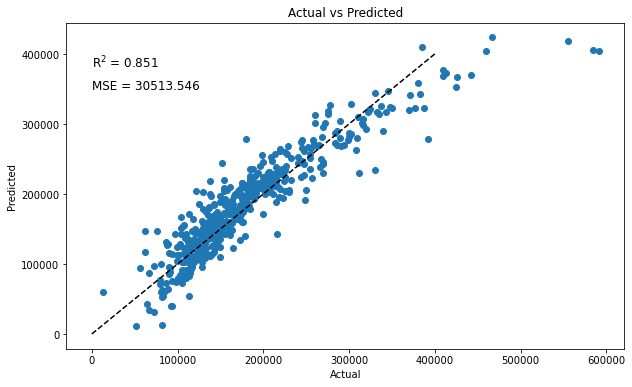

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Actual vs Predicted');

In [10]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 16354.560964742686,
 'Year Built': 174.7472556901391,
 'Year Remod/Add': 379.9689742528062,
 'Mas Vnr Area': 33.92550461648179,
 'BsmtFin SF 1': 25.680209875382793,
 'Gr Liv Area': 31.496793191398055,
 'TotRms AbvGrd': 598.6233750054648,
 'Fireplaces': 6493.04227161244,
 'Garage Cars': -3534.000066663069,
 'Garage Area': 49.49351171006121,
 'Bathrooms': -2718.035399607012,
 'SF': 25.5564598847443}

-----------------------------

In [11]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
lr = RidgeCV()

In [13]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8539203189814442, 0.8514174790186766)

In [14]:
mean_squared_error(y_train, lr.predict(X_train))

912576032.484385

In [15]:
y_pred = lr.predict(X_test)

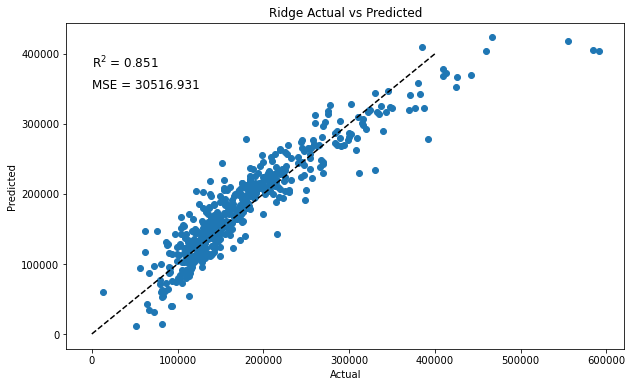

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Ridge Actual vs Predicted');
plt.savefig('../images/Ridge Actual vs Predicted.jpg');

In [17]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 16219.210440912968,
 'Year Built': 174.65750955449766,
 'Year Remod/Add': 381.4297020873055,
 'Mas Vnr Area': 34.053682677447796,
 'BsmtFin SF 1': 25.66729921195656,
 'Gr Liv Area': 31.535059563815594,
 'TotRms AbvGrd': 570.2623941090424,
 'Fireplaces': 6363.135822578304,
 'Garage Cars': -3258.477848518123,
 'Garage Area': 48.811107544694096,
 'Bathrooms': -2670.8941972716275,
 'SF': 25.69228895008564}

--------------------------------------

In [18]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
lr = LassoCV()

In [20]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8155463983051581, 0.8090398682256688)

In [21]:
mean_squared_error(y_train, lr.predict(X_train))

1152302187.6721652

In [22]:
y_pred = lr.predict(X_test)

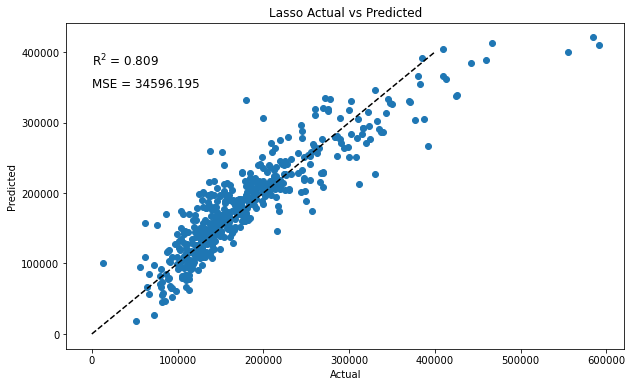

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Lasso Actual vs Predicted');
plt.savefig('../images/Lasso Actual vs Predicted.jpg');

In [24]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 0.0,
 'Year Built': 276.1651703195428,
 'Year Remod/Add': 493.68590734364335,
 'Mas Vnr Area': 47.38641440230781,
 'BsmtFin SF 1': 22.810366777357633,
 'Gr Liv Area': 31.76898783254659,
 'TotRms AbvGrd': -0.0,
 'Fireplaces': 0.0,
 'Garage Cars': 0.0,
 'Garage Area': 54.78149506455318,
 'Bathrooms': 0.0,
 'SF': 40.975890675866296}

-----------------------------

In [25]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)

PolynomialFeatures(include_bias=False)

In [27]:
X_train_pf = pf.transform(X_train)

In [28]:
X_test_pf = pf.transform(X_test)

In [29]:
lr = LinearRegression()
lr.fit(X_train_pf, y_train)

LinearRegression()

In [30]:
lr.score(X_train_pf, y_train), lr.score(X_test_pf, y_test)

(0.9140535804606484, 0.9066852768014555)

In [31]:
mean_squared_error(y_train, lr.predict(X_train_pf))

536916852.5189822

In [32]:
y_pred = lr.predict(X_test_pf)

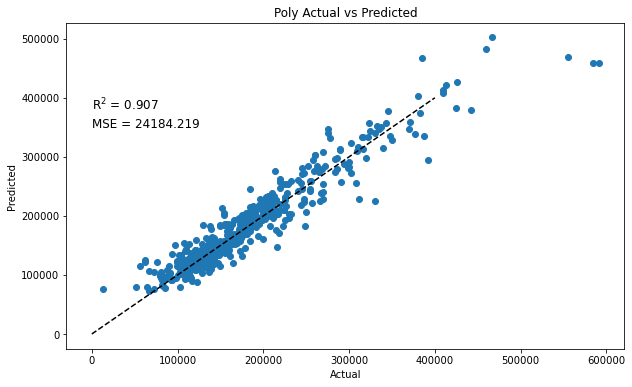

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test_pf, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Poly Actual vs Predicted');
plt.savefig('../images/Poly Actual vs Predicted.jpg');

In [34]:
high_corr_cols

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Gr Liv Area', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'SalePrice', 'Bathrooms', 'SF'],
      dtype='object')

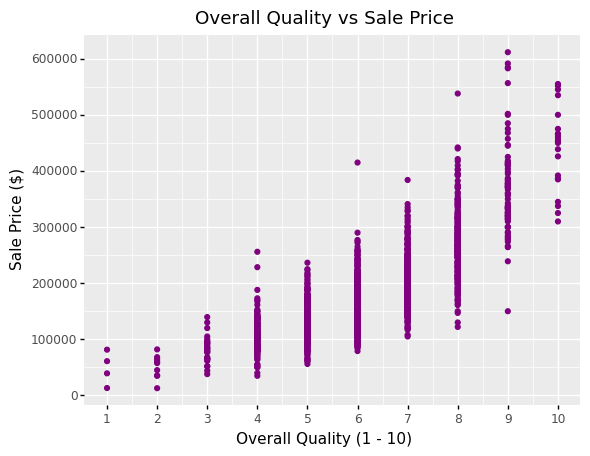

<ggplot: (122093426613)>

In [35]:
overall_qual = (
    p9.ggplot(data=train, mapping=p9.aes(x='Overall Qual', y='SalePrice'))
    + p9.xlab("Overall Quality (1 - 10)")
    + p9.ylab("Sale Price ($)")
    + p9.scale_x_continuous(breaks=np.arange(0, 11, 1))
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    + p9.ggtitle("Overall Quality vs Sale Price")
    + p9.geom_point(color='purple')
)
overall_qual

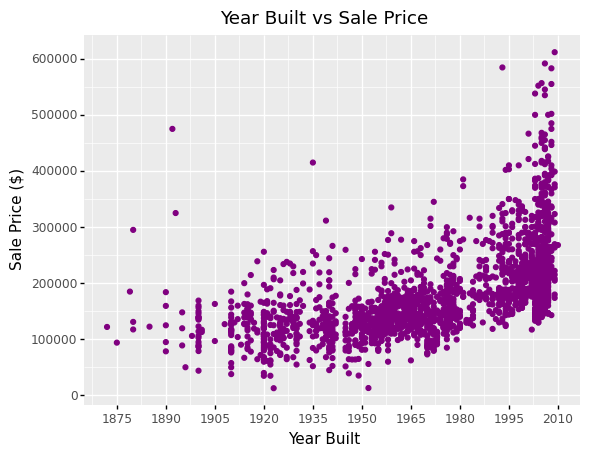

<ggplot: (122093080887)>

In [36]:
year_built = (
    p9.ggplot(data=train, mapping=p9.aes(x='Year Built', y='SalePrice'))
    + p9.xlab("Year Built")
    + p9.ylab("Sale Price ($)")
    + p9.scale_x_continuous(breaks=np.arange(1800, 2060, 15))
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    
    + p9.ggtitle("Year Built vs Sale Price")
    + p9.geom_point(color='purple')
)
year_built

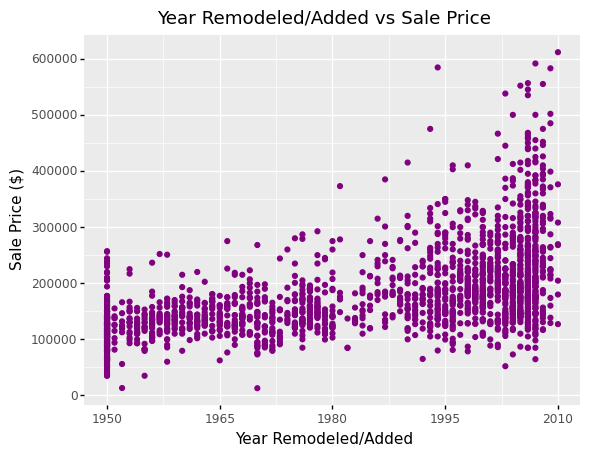

<ggplot: (122093491541)>

In [37]:
year_rem = (
    p9.ggplot(data=train, mapping=p9.aes(x='Year Remod/Add', y='SalePrice'))
    + p9.xlab("Year Remodeled/Added")
    + p9.ylab("Sale Price ($)")
    + p9.scale_x_continuous(breaks=np.arange(1950, 2060, 15))
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    
    + p9.ggtitle("Year Remodeled/Added vs Sale Price")
    + p9.geom_point(color='purple')
)
year_rem

<Figure size 432x288 with 0 Axes>

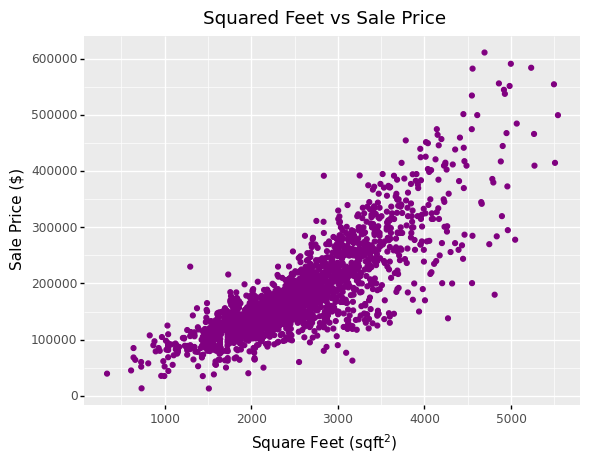

<ggplot: (122095848430)>

In [42]:
sf = (
    p9.ggplot(data=train, mapping=p9.aes(x='SF', y='SalePrice'))
    + p9.xlab("Square Feet (sqft$^2$)")
    + p9.ylab("Sale Price ($)")
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    
    + p9.ggtitle("Squared Feet vs Sale Price")
    + p9.geom_point(color='purple')
)
sf

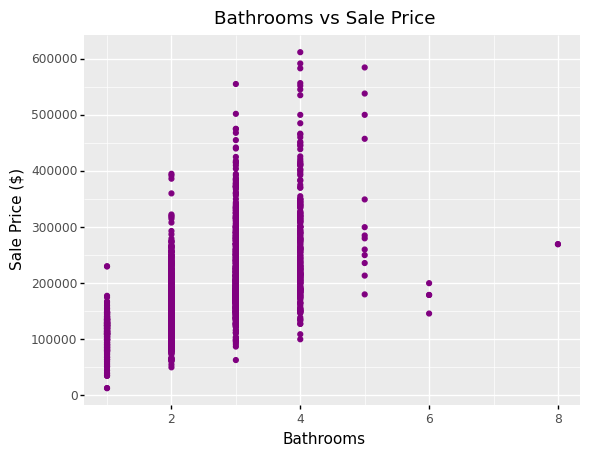

<ggplot: (122095801826)>

In [40]:
bathrooms = (
    p9.ggplot(data=train, mapping=p9.aes(x='Bathrooms', y='SalePrice'))
    + p9.xlab("Bathrooms")
    + p9.ylab("Sale Price ($)")
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    
    + p9.ggtitle("Bathrooms vs Sale Price")
    + p9.geom_point(color='purple')
)
bathrooms